___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice

import numpy as np


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [23]:
dados = range(100000)

num = list()
dic = {}
for i in dados:
    x = np.random.randint(1,7)
    num.append(x)
    if x in dic:
        dic[x] += 1
    if not x in dic:
        dic[x] = 1
    
print(dic)


{1: 16797, 2: 16598, 3: 16477, 4: 16590, 5: 16654, 6: 16884}


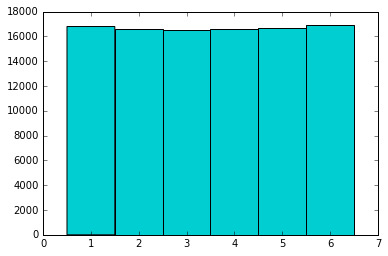

In [24]:
c=['darkturquoise']
plt.hist(num,bins = np.arange(0.5,7,1), color=c)
plt.show()

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [20]:
dado = (1,2,3,4,5,6)
prob = []

for i in dado:
    for j in dado:
        if i + j == 7:
            prob.append(1)
            
probt = 6*6
probs = (len(prob)/probt*100)
print ("A probabilidade de a soma ser 7 é de {0} %".format(probs))    

A probabilidade de a soma ser 7 é de 16.666666666666664 %


In [25]:
resultados = []

for i in range (100000):
    dado1 = np.random.randint(1,7)
    dado2 = np.random.randint(1,7)
    soma = dado1 + dado2
    if soma == 7:
        resultados.append(1)
    else:
        resultados.append(0)
        
print(resultados.count(1)/len(resultados)*100)

16.561999999999998


___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [22]:
vence = list()
perde = list()
    
for i in range(10000):
    portas = [1,2,3]
    premiada = np.random.choice(portas)
    escolhida = np.random.choice(portas)
    lista = portas
    
    if premiada == escolhida:
        lista.remove(premiada)
        lista.remove(np.random.choice(lista))
        
        perde.append("Perdeu!")
        
    if premiada != escolhida:
        lista.remove(premiada)
        lista.remove(escolhida)
        
        vence.append("Ganhou!")
    
print("A chance de ganhar é de {0}% ou 2/3.".format(len(vence)/100))

A chance de ganhar é de 67.15% ou 2/3.
